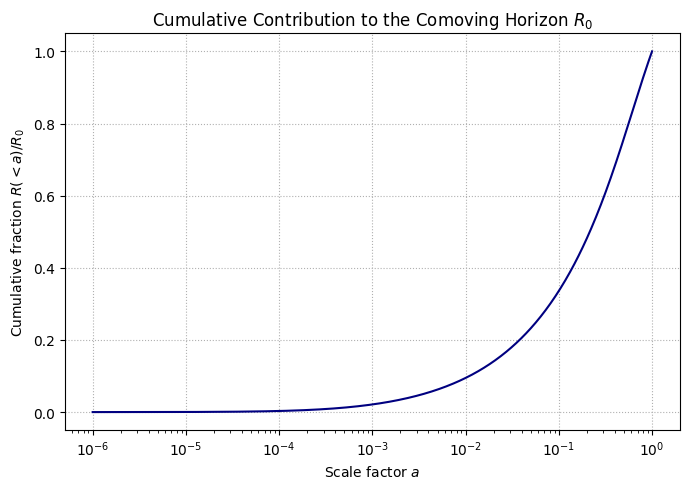

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# --- Constants (SFT / ΛCDM baseline 2025-10) ---
H0 = 67.77e3 / 3.08568e22  # H0 = 67.77 km/s/Mpc → s⁻¹
c = 2.99792458e8           # m/s
Omega_m0 = 0.31500
Omega_r0 = 9.034e-5
Omega_DE0 = 0.68491

# --- Define Hubble parameter for ΛCDM ---
def H_LCDM(a):
    return H0 * np.sqrt(
        Omega_r0 / a**4 +
        Omega_m0 / a**3 +
        Omega_DE0
    )

# --- Integrand for the particle horizon integral ---
def integrand_R0(a):
    return c / (a**2 * H_LCDM(a))

# --- Integration grid (log-spaced scale factors) ---
a_vals = np.logspace(-6, 0, 800)  # from a=1e-6 to 1
cum_R = np.array([quad(integrand_R0, 1e-6, a)[0] for a in a_vals])

# --- Normalize to total horizon R₀ ---
cum_R /= cum_R[-1]

# --- Plot ---
plt.figure(figsize=(7,5))
plt.semilogx(a_vals, cum_R, color='navy')
plt.xlabel(r"Scale factor $a$")
plt.ylabel(r"Cumulative fraction $R(<a)/R_0$")
plt.title(r"Cumulative Contribution to the Comoving Horizon $R_0$")
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.show()
